In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import requests

df = pd.read_csv('https://raw.githubusercontent.com/Rekha215/Machine-Learning-Laboratory/main/regression_dataset.csv')
df.head()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,target
0,2.056544,0.606851,0.482688,-1.130888,0.420094,74.905613
1,-0.799192,-0.645964,-0.182896,-0.482744,1.374876,-41.649588
2,1.076007,-0.796026,-0.751969,0.021312,-0.319054,-24.182866
3,-0.103255,-0.828497,1.489863,-1.643189,-1.600904,-87.094505
4,-2.063403,0.503252,-0.645572,-0.317350,-1.661083,-86.122029


In [ ]:
scaler = preprocessing.StandardScaler()
df[['Feature_1', 'Feature_2', 'Feature_3', 'Feature_4', 'Feature_5']] = scaler.fit_transform(df[['Feature_1', 'Feature_2', 'Feature_3', 'Feature_4', 'Feature_5']])

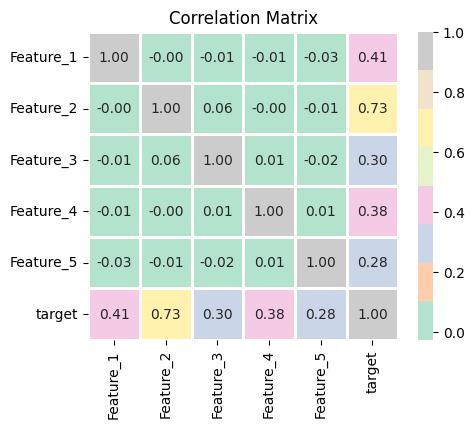

In [ ]:
import seaborn as sns
plt.figure(figsize=(5, 4))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='Pastel2', fmt='.2f', linewidths=1)
plt.title('Correlation Matrix')
plt.show()



In [ ]:
X = df.iloc[:,:5]
Y = df.iloc[:,-1:]
X.head()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5
0,2.136850,0.599420,0.482008,-1.177462,0.425087
1,-0.839853,-0.647388,-0.184430,-0.521671,1.353201
2,1.114779,-0.796730,-0.754232,-0.011670,-0.293416
3,-0.114436,-0.829046,1.490475,-1.695806,-1.539463
4,-2.157615,0.496318,-0.647699,-0.354327,-1.597962


In [ ]:
X = np.array(X)
Y = np.array(Y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.30, random_state=42)

#Average KNN Regression

In [ ]:
from collections import Counter
from sklearn.metrics import accuracy_score

def euclidean_distance(x,y,p):
  dis = np.sum(np.abs(x - y) ** p) ** (1 / p)
  return dis

class KNN_regressor:
  def __init__(self,k=3,distance_metric='euclidean', p=2):
    self.k=k
    self.distance_metric = distance_metric
    self.p=p

  def fit_KNN(self, X_train, y_train):
    self.X_train = X_train
    self.y_train = y_train

  def _computedistance(self, x):
    distance = [euclidean_distance(x,x_train,p=self.p) for x_train in self.X_train]
    return distance

  def predict_KNN(self, X_test):
    pred = []
    for x in X_test:
      #print(x)
      dist = self._computedistance(x)
      k_ind = np.argsort(dist)[:self.k]
      val = [self.y_train[i] for i in k_ind]
      pred.append(sum(val)/len(val))            #average of k nearest is taken
    return pred


In [ ]:
regknn = KNN_regressor(k=3, distance_metric='euclidean',p=2)
regknn.fit_KNN(X_train, y_train)
y_val_pred = regknn.predict_KNN(X_val)
y_test_pred = regknn.predict_KNN(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_test_pred)


364.1725081161066

In [ ]:
#mse vs p
pvalues = [1,2,5]
kvals = [3,7,11]
mse = []
minimum_mse = 1000000
bestp, bestk=0,0        #best p value and best k value
for p in pvalues:
  for k in kvals:
    regknn = KNN_regressor(k=k, distance_metric='euclidean',p=p)
    regknn.fit_KNN(X_train, y_train)
    y_val_pred = regknn.predict_KNN(X_val)
    y_test_pred = regknn.predict_KNN(X_test)
    MSE = mean_squared_error(y_test, y_test_pred)
    print("For P = {}, k = {}, the MSE is = {}".format(p,k,MSE))
    mse.append(MSE)
    if(minimum_mse > MSE):
      minimum_mse = MSE
      bestp=p
      bestk=k
print("Lowest MSE occurs at P = {} and k = {}".format(bestp, bestk))

For P = 1, k = 3, the MSE is = 419.9678406550854
For P = 1, k = 7, the MSE is = 442.5830488003206
For P = 1, k = 11, the MSE is = 471.3733845874986
For P = 2, k = 3, the MSE is = 364.1725081161066
For P = 2, k = 7, the MSE is = 343.13596176245574
For P = 2, k = 11, the MSE is = 397.65557542802287
For P = 5, k = 3, the MSE is = 366.2535079770389
For P = 5, k = 7, the MSE is = 345.6951108807848
For P = 5, k = 11, the MSE is = 414.9742682443565
Lowest MSE occurs at P = 2 and k = 7


In [ ]:
k_values = [3,7,11,3,7,11,3,7,11]
p_values = [1,1,1,2,2,2,5,5,5]
#print(mse)
plotdf = pd.DataFrame({'K':k_values, 'P':p_values, 'MSE':mse})
import plotly.express as px
fig = px.scatter_3d(plotdf, x='K', y='P', z='MSE')
fig.show()

#Weighted KNN Regression

In [ ]:
from collections import Counter
from sklearn.metrics import accuracy_score

def euclidean_distance(x,y,p):
  dis = np.sum(np.abs(x - y) ** p) ** (1 / p)
  return dis

class WKNN_regressor:
  def __init__(self,k=3,distance_metric='euclidean', p=2):
    self.k=k
    self.distance_metric = distance_metric
    self.p=p

  def fit_KNN(self, X_train, y_train):
    self.X_train = X_train
    self.y_train = y_train

  def _computedistance(self, x):
    distance = [euclidean_distance(x,x_train,p=self.p) for x_train in self.X_train]
    return distance

  def predict_KNN(self, X_test):
    pred = []
    for x in X_test:
      dist = self._computedistance(x)
      k_ind = np.argsort(dist)[:self.k]
      kdist = [dist[i] for i in k_ind]
      val = [self.y_train[i] for i in k_ind]
      val = np.array(val)
      closeness = 1/(np.array(kdist))
      sum,densum = 0,0
      for i in range(self.k):               #weighted average is taken of k nearest
        sum += closeness[i] * val[i]
        densum += closeness[i]
      finalpred = sum/densum

      pred.append(finalpred)


    return pred

In [ ]:
#mse vs p
pvalues = [1,2,5]
kvals = [3,7,11]
wmse = []
weighted_minimum_mse = 1000000
bestp, bestk=0,0        #best p value and best k value
for p in pvalues:
  for k in kvals:
    regknn = WKNN_regressor(k=k, distance_metric='euclidean',p=p)
    regknn.fit_KNN(X_train, y_train)
    y_val_pred = regknn.predict_KNN(X_val)
    y_test_pred = regknn.predict_KNN(X_test)
    MSE = mean_squared_error(y_test, y_test_pred)
    print("For P = {}, k = {}, the MSE is = {}".format(p,k,MSE))
    wmse.append(MSE)
    if(weighted_minimum_mse > MSE):
      weighted_minimum_mse = MSE
      bestp=p
      bestk=k
print("Lowest MSE occurs at P = {} and k = {}".format(bestp, bestk))

For P = 1, k = 3, the MSE is = 401.18018808866674
For P = 1, k = 7, the MSE is = 407.07397381365166
For P = 1, k = 11, the MSE is = 435.60270748152305
For P = 2, k = 3, the MSE is = 347.52746391768204
For P = 2, k = 7, the MSE is = 316.7183989170743
For P = 2, k = 11, the MSE is = 360.69710561259257
For P = 5, k = 3, the MSE is = 347.4965249416132
For P = 5, k = 7, the MSE is = 322.2305035932688
For P = 5, k = 11, the MSE is = 377.146377952531
Lowest MSE occurs at P = 2 and k = 7


In [ ]:
k_values = [3,7,11,3,7,11,3,7,11]
p_values = [1,1,1,2,2,2,5,5,5]
#print(mse)
plotdf = pd.DataFrame({'K':k_values, 'P':p_values, 'MSE':wmse})
import plotly.express as px
fig = px.scatter_3d(plotdf, x='K', y='P', z='MSE')
fig.show()

#KNN using Sklearn

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

sklk = [3,7,11]
sklp = [1,2,5]
skl_mse = 1000000
for k in sklk:
  for p in sklp:
    knn_regressor = KNeighborsRegressor(n_neighbors=k, algorithm='brute', p=p)
    knn_regressor.fit(X_train, y_train)
    y_pred = knn_regressor.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    skl_mse = min(skl_mse, mse)
print("Sklearn MSE = ", skl_mse)
print("From Scratch MSE = ", minimum_mse)
print("From Scratch weight MSE = ", weighted_minimum_mse)

Sklearn MSE =  343.13596176245574
From Scratch MSE =  343.13596176245574
From Scratch weight MSE =  316.7183989170743


#Task 5
Sklearn and average knn perform same but weighted average knn performs better than both. Sklearn gives an MSE of 343.13 which is the same for average KNN regressor. Weighted Average KNN gives an MSE of 316.71